In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def handle_dangling_nodes(A):
    for i in range(A.shape[0]):
        if np.all(A[i] == 0):
            A[i] = 1 / A.shape[1]
    return A

In [3]:
def normalize(vector):
    return vector / np.linalg.norm(vector)

In [4]:
def power_iteration(A, max_iters=300, tol=1e-10):
    v = np.random.rand(A.shape[0])  # Random initial vector
    v = normalize(v)
    residuals = []
    rayleigh_quotients = []
    V = np.copy(v)

    for k in range(max_iters):
        w = A.dot(v)
        v_new = normalize(w)

        # Compute Rayleigh Quotient
        rayleigh = np.dot(v_new, A.dot(v_new))
        rayleigh_quotients.append(rayleigh)

        # Compute Residual Norm
        residual = np.linalg.norm(A.dot(v_new) - rayleigh * v_new)
        residuals.append(residual)

        V = np.vstack((V, v_new))

        # Convergence check
        if residual < tol:
            break

        v = v_new

    return v, rayleigh_quotients, residuals, V


In [6]:
def plot_results(rayleigh_quotients, residuals, diff_norm):
    # Plot residual norm
    plt.figure(figsize=(10, 6))
    plt.plot(residuals, label="Residual Norm", color="blue")
    plt.xlabel("Iteration Count")
    plt.ylabel("2-norm of the Residual")
    plt.title("Convergence of Residual Norm")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot successive iterate difference norm
    plt.figure(figsize=(10, 6))
    plt.plot(diff_norm, label="Difference Norm", color="orange")
    plt.xlabel("Iteration Count")
    plt.ylabel("Distance Between Successive Iterates")
    plt.title("Convergence of Successive Iterates")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot Rayleigh Quotient
    plt.figure(figsize=(10, 6))
    plt.plot(rayleigh_quotients, label="Rayleigh Quotient", color="green")
    plt.xlabel("Iteration Count")
    plt.ylabel("Rayleigh Quotient")
    plt.title("Convergence of Rayleigh Quotient")
    plt.grid(True)
    plt.legend()
    plt.show()


PageRank: [0.05942722 0.08870744 0.06536994 0.09090909 0.08264463 0.12123414
 0.05510643 0.18407048 0.13572915 0.11680149]
Highest Page Rank Node: 7
Lowest Page Rank Node: 6


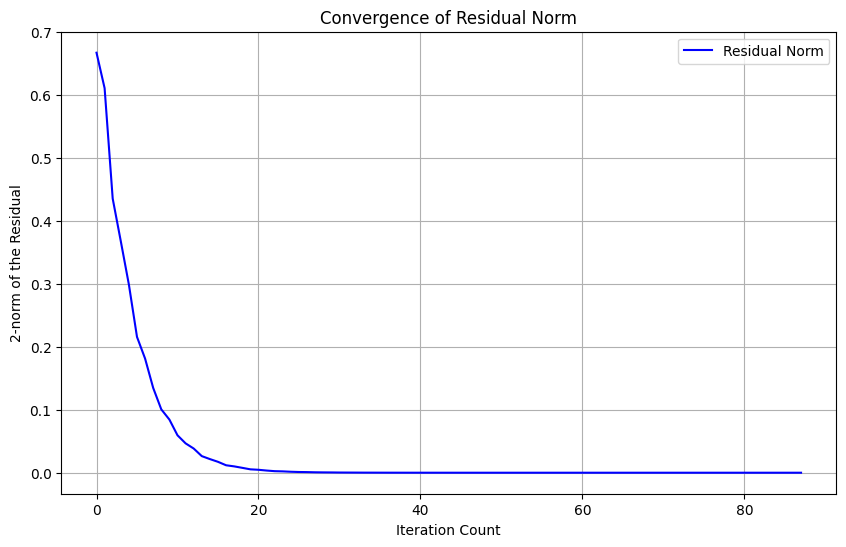

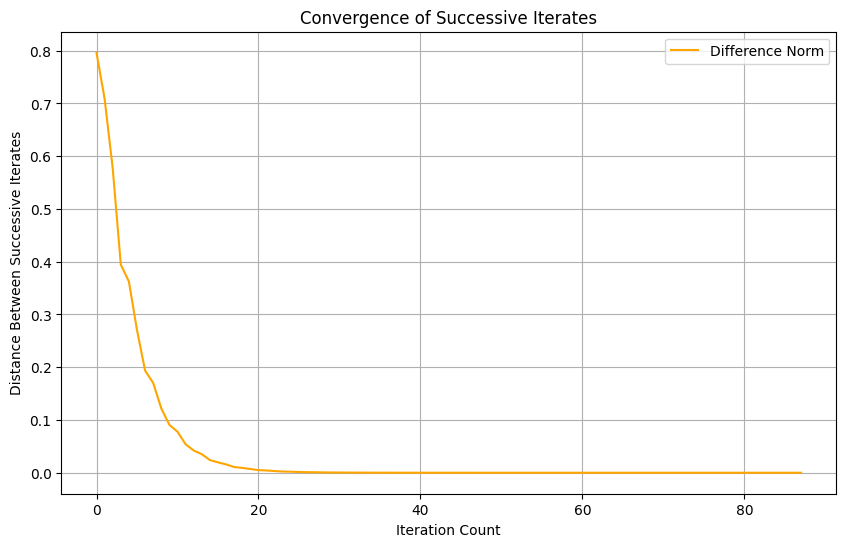

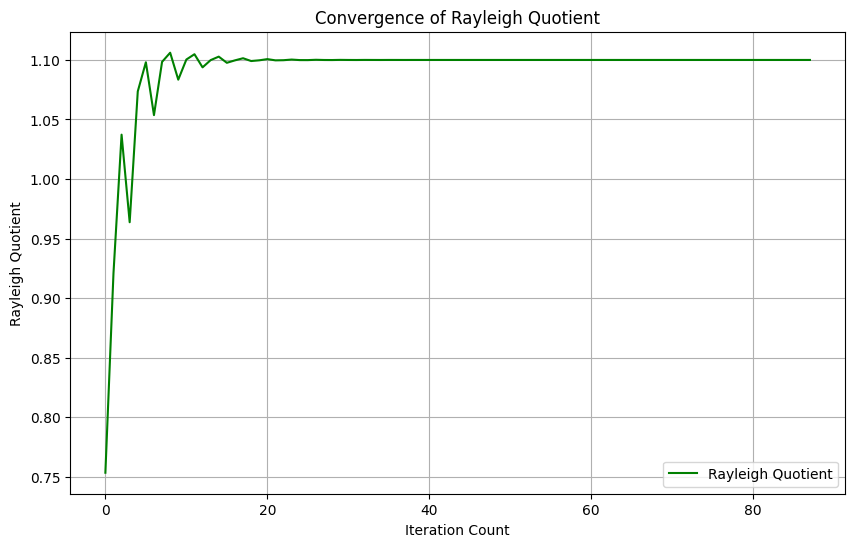

In [7]:
# Main code
if __name__ == "__main__":
    # Define the Markov Transition Matrix
    A = np.array([
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0.5, 0, 0, 0, 0, 0, 0, 0, 0.5, 0],
        [0, 0.5, 0, 0, 0, 0, 0.5, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0.5, 0, 0, 0.5, 0, 0],
        [0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0],
        [0, 0.5, 0, 0, 0.5, 0, 0, 0, 0, 1],
        [0.5, 0, 0, 0, 0, 0, 0.5, 0.5, 0, 0],
        [0, 0, 0, 0, 0, 0.5, 0, 0, 0.5, 0]
    ])

    # Handle dangling nodes
    A = handle_dangling_nodes(A)

    # Perform power iteration
    dominant_vector, rayleigh_quotients, residuals, V = power_iteration(A)

    # Compute the norm of successive differences
    diff_norm = np.linalg.norm(V[:-1, :] - V[1:, :], axis=1)

    # Display the PageRank
    page_rank = np.abs(dominant_vector)
    page_rank /= np.sum(page_rank)
    print("PageRank:", page_rank)
    print("Highest Page Rank Node:", np.argmax(page_rank))
    print("Lowest Page Rank Node:", np.argmin(page_rank))

    # Plot the results
    plot_results(rayleigh_quotients, residuals, diff_norm)